Data Collection

About Dataset

This dataset has data from 2014-2016 data for different commodities purchased across the state of Maharashtra.

Columns

1.APMC : Agricultural Produce Marketing Committee. It is a categorical variable. Places of different APMC are in it.

2.Commodity : Names of commodities grown. Categorical.

3.Year : Year of collection of the commodity at APMC.

4.Month : Month of collection.

5.arrivals_in_qtl : Quantity if commodity collected in quintals.

6.min_price : Minimum price for the commodity.

7.max_price : Maximum price for the commodity.

8.modal_price : Target variable. Price given to farmers.

9.date : Date of collection.

10district_name : Name of the district of APMC.

11.state_name : Name of state. Considering only for Maharashtra, so all values are Maharashtra.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Importing data into python environment

In [2]:
data=pd.read_csv('C:/Users/Admin/Downloads/Monthly_data_cmo.csv')
data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62429 entries, 0 to 62428
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   APMC             62429 non-null  object
 1   Commodity        62429 non-null  object
 2   Year             62429 non-null  int64 
 3   Month            62429 non-null  object
 4   arrivals_in_qtl  62429 non-null  int64 
 5   min_price        62429 non-null  int64 
 6   max_price        62429 non-null  int64 
 7   modal_price      62429 non-null  int64 
 8   date             62429 non-null  object
 9   district_name    62429 non-null  object
 10  state_name       62429 non-null  object
dtypes: int64(5), object(6)
memory usage: 5.2+ MB


In [4]:
data.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


In [5]:
data.shape

(62429, 11)

## 2.Pre-Processing
### a.Missing value handling

In [6]:
#checking for missing values
data.isnull().sum()

APMC               0
Commodity          0
Year               0
Month              0
arrivals_in_qtl    0
min_price          0
max_price          0
modal_price        0
date               0
district_name      0
state_name         0
dtype: int64

In [7]:
#there are no missing values

### b.Outlier detection and Handling

<AxesSubplot:>

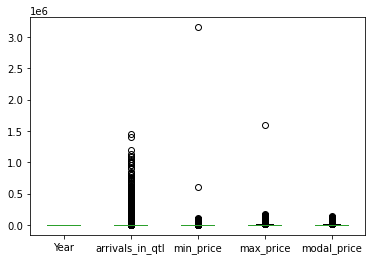

In [8]:
# plotting boxplot of the entire dataset
data.plot(kind='box')

In [9]:
Q1 = np.percentile(data['arrivals_in_qtl'],25,interpolation='midpoint')
Q3 = np.percentile(data['arrivals_in_qtl'],75,interpolation='midpoint')

IQR = Q3-Q1
low_limit=Q1-1.5*IQR
high_limit=Q3+1.5*IQR

index=data['arrivals_in_qtl'][(data['arrivals_in_qtl']<low_limit)|(data['arrivals_in_qtl']>high_limit)].index
data.drop(index,inplace=True)

In [10]:
Q1 = np.percentile(data['min_price'],25,interpolation='midpoint')
Q3 = np.percentile(data['min_price'],75,interpolation='midpoint')

IQR = Q3-Q1
low_limit=Q1-1.5*IQR
high_limit=Q3+1.5*IQR

index=data['min_price'][(data['min_price']<low_limit)|(data['min_price']>high_limit)].index
data.drop(index,inplace=True)

In [11]:
Q1 = np.percentile(data['max_price'],25,interpolation='midpoint')
Q3 = np.percentile(data['max_price'],75,interpolation='midpoint')

IQR = Q3-Q1
low_limit=Q1-1.5*IQR
high_limit=Q3+1.5*IQR

index=data['max_price'][(data['max_price']<low_limit)|(data['max_price']>high_limit)].index
data.drop(index,inplace=True)

In [12]:
Q1 = np.percentile(data['modal_price'],25,interpolation='midpoint')
Q3 = np.percentile(data['modal_price'],75,interpolation='midpoint')

IQR = Q3-Q1
low_limit=Q1-1.5*IQR
high_limit=Q3+1.5*IQR

index=data['modal_price'][(data['modal_price']<low_limit)|(data['modal_price']>high_limit)].index
data.drop(index,inplace=True)

<AxesSubplot:>

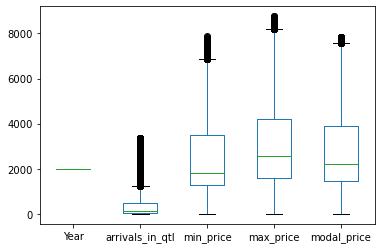

In [13]:
data.plot(kind='box')

In [14]:
data.dtypes

APMC               object
Commodity          object
Year                int64
Month              object
arrivals_in_qtl     int64
min_price           int64
max_price           int64
modal_price         int64
date               object
district_name      object
state_name         object
dtype: object

### c.Encoding

In [15]:
data.nunique()

APMC                340
Commodity           327
Year                  3
Month                12
arrivals_in_qtl    3082
min_price          6691
max_price          7386
modal_price        7098
date                 27
district_name        33
state_name            1
dtype: int64

In [16]:
## one hot encoding

data=pd.get_dummies(data,columns=['Year'])
data.head()

,APMC,Commodity,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,Year_2014,Year_2015,Year_2016
0,Ahmednagar,Bajri,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra,0,1,0
1,Ahmednagar,Bajri,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra,0,0,1
2,Ahmednagar,Wheat(Husked),April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra,0,1,0
3,Ahmednagar,Wheat(Husked),April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra,0,0,1
5,Ahmednagar,Sorgum(Jawar),April,2093,1695,2454,2119,2016-04,Ahmadnagar,Maharashtra,0,0,1


In [17]:
import category_encoders as ce


In [18]:
encoder= ce.BaseNEncoder(cols=['APMC','Commodity','district_name'],return_df=True,base=3)
data.head()

,APMC,Commodity,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,Year_2014,Year_2015,Year_2016
0,Ahmednagar,Bajri,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra,0,1,0
1,Ahmednagar,Bajri,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra,0,0,1
2,Ahmednagar,Wheat(Husked),April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra,0,1,0
3,Ahmednagar,Wheat(Husked),April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra,0,0,1
5,Ahmednagar,Sorgum(Jawar),April,2093,1695,2454,2119,2016-04,Ahmadnagar,Maharashtra,0,0,1


In [19]:
pd.set_option( 'display.max_columns', None)


In [20]:
## to fit and transform the data

data_encoded=encoder.fit_transform(data)
data_encoded.head()

,APMC_0,APMC_1,APMC_2,APMC_3,APMC_4,APMC_5,Commodity_0,Commodity_1,Commodity_2,Commodity_3,Commodity_4,Commodity_5,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name_0,district_name_1,district_name_2,district_name_3,state_name,Year_2014,Year_2015,Year_2016
0,0,0,0,0,0,1,0,0,0,0,0,1,April,79,1406,1538,1463,2015-04,0,0,0,1,Maharashtra,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,1,April,106,1788,1925,1875,2016-04,0,0,0,1,Maharashtra,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,2,April,1253,1572,1890,1731,2015-04,0,0,0,1,Maharashtra,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,2,April,387,1750,2220,1999,2016-04,0,0,0,1,Maharashtra,0,0,1
5,0,0,0,0,0,1,0,0,0,0,1,0,April,2093,1695,2454,2119,2016-04,0,0,0,1,Maharashtra,0,0,1


In [21]:
## Droping unwanted column 
data_encoded=data_encoded.drop(['Month','state_name'],axis=1)

In [22]:
data_encoded['date'] = pd.to_datetime(data_encoded['date'])
data_encoded.head()

,APMC_0,APMC_1,APMC_2,APMC_3,APMC_4,APMC_5,Commodity_0,Commodity_1,Commodity_2,Commodity_3,Commodity_4,Commodity_5,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name_0,district_name_1,district_name_2,district_name_3,Year_2014,Year_2015,Year_2016
0,0,0,0,0,0,1,0,0,0,0,0,1,79,1406,1538,1463,2015-04-01,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,1,106,1788,1925,1875,2016-04-01,0,0,0,1,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,2,1253,1572,1890,1731,2015-04-01,0,0,0,1,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,2,387,1750,2220,1999,2016-04-01,0,0,0,1,0,0,1
5,0,0,0,0,0,1,0,0,0,0,1,0,2093,1695,2454,2119,2016-04-01,0,0,0,1,0,0,1


In [23]:
## Data types of the current dataframe
data_encoded.dtypes

APMC_0                      int64
APMC_1                      int64
APMC_2                      int64
APMC_3                      int64
APMC_4                      int64
APMC_5                      int64
Commodity_0                 int64
Commodity_1                 int64
Commodity_2                 int64
Commodity_3                 int64
Commodity_4                 int64
Commodity_5                 int64
arrivals_in_qtl             int64
min_price                   int64
max_price                   int64
modal_price                 int64
date               datetime64[ns]
district_name_0             int64
district_name_1             int64
district_name_2             int64
district_name_3             int64
Year_2014                   uint8
Year_2015                   uint8
Year_2016                   uint8
dtype: object

### scaling

In [24]:
data_encoded.describe()

,APMC_0,APMC_1,APMC_2,APMC_3,APMC_4,APMC_5,Commodity_0,Commodity_1,Commodity_2,Commodity_3,Commodity_4,Commodity_5,arrivals_in_qtl,min_price,max_price,modal_price,district_name_0,district_name_1,district_name_2,district_name_3,Year_2014,Year_2015,Year_2016
count,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000,48822.000000
mean,0.323584,0.661382,0.964811,0.809000,0.912724,0.957232,0.010385,0.169288,0.521179,0.616239,0.837778,1.127832,434.456925,2518.195916,3091.000922,2820.794969,0.219082,0.835771,0.897034,0.827926,0.130474,0.410614,0.458912
std,0.467848,0.826404,0.802609,0.789335,0.806117,0.779264,0.101376,0.471898,0.738271,0.762540,0.769271,0.834411,679.713121,1781.338440,1926.575827,1845.320987,0.413628,0.900435,0.795764,0.782291,0.336828,0.491950,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1265.000000,1574.000000,1446.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,126.000000,1820.000000,2571.000000,2223.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,510.000000,3508.000000,4225.000000,3901.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3353.000000,7892.000000,8760.000000,7825.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000


### e.Normalization

In [25]:
## min max scalar
data_min_max_scaled=data_encoded.copy()
columns=['arrivals_in_qtl','min_price','max_price','modal_price']
##
for column in columns:
    data_min_max_scaled[column] = (data_min_max_scaled[column] - data_min_max_scaled[column].min()) / (data_min_max_scaled[column].max() - data_min_max_scaled[column].min())    
##
data_min_max_scaled.head()
    

,APMC_0,APMC_1,APMC_2,APMC_3,APMC_4,APMC_5,Commodity_0,Commodity_1,Commodity_2,Commodity_3,Commodity_4,Commodity_5,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name_0,district_name_1,district_name_2,district_name_3,Year_2014,Year_2015,Year_2016
0,0,0,0,0,0,1,0,0,0,0,0,1,0.023270,0.178155,0.175571,0.186965,2015-04-01,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,1,0.031325,0.226559,0.219749,0.239617,2016-04-01,0,0,0,1,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,2,0.373508,0.199189,0.215753,0.221214,2015-04-01,0,0,0,1,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,2,0.115155,0.221744,0.253425,0.255463,2016-04-01,0,0,0,1,0,0,1
5,0,0,0,0,0,1,0,0,0,0,1,0,0.624105,0.214774,0.280137,0.270799,2016-04-01,0,0,0,1,0,0,1


## 3. Exploratory Data Analysis (EDA)


In [26]:
## Top 10 districts in terms of model_price
data['modal_price'].groupby(data['district_name']).sum().sort_values(ascending=False).head(10)

district_name
Pune          12959479
Ahmadnagar    10344726
Solapur        8674447
Nagpur         8237662
Nasik          7533473
Buldhana       6555445
Satara         6366674
Jalgaon        6256608
Amaravathi     6099255
Beed           5346868
Name: modal_price, dtype: int64

In [27]:
## Highest modal_price month_wise
data['modal_price'].groupby(data['Month']).sum().sort_values(ascending=False).head(12)

Month
September    15107217
November     14912368
October      14305179
June         12262494
July         11150946
August       10793616
May          10585877
January      10113101
December      9894654
March         9657496
February      9524624
April         9409280
Name: modal_price, dtype: int64

In [28]:
## Creating a copy
df=data.copy()

In [29]:
## Creating a dictionary of months
mon={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}

In [30]:
## Mapping Month column with mon dictionary
df['Month'] = df['Month'].map(mon)

In [31]:
## Output
df.head()

,APMC,Commodity,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name,Year_2014,Year_2015,Year_2016
0,Ahmednagar,Bajri,4,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra,0,1,0
1,Ahmednagar,Bajri,4,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra,0,0,1
2,Ahmednagar,Wheat(Husked),4,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra,0,1,0
3,Ahmednagar,Wheat(Husked),4,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra,0,0,1
5,Ahmednagar,Sorgum(Jawar),4,2093,1695,2454,2119,2016-04,Ahmadnagar,Maharashtra,0,0,1


In [32]:
df1=df['Commodity'].groupby(df['district_name']).count().reset_index(name='count').sort_values(by=['count'],ascending=False)

### a.Univariate Analysis


In [35]:
df1=df['Commodity'].groupby(df['Commodity']).count().reset_index(name="count").sort_values(by=['count'],ascending=False).head(30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Wheat(Husked)'),
  Text(1, 0, 'Gram'),
  Text(2, 0, 'Sorgum(Jawar)'),
  Text(3, 0, 'Soybean'),
  Text(4, 0, 'Bajri'),
  Text(5, 0, 'Maize'),
  Text(6, 0, 'Green Gram'),
  Text(7, 0, 'Pigeon Pea (Tur)'),
  Text(8, 0, 'Ground Nut Pods (Dry)'),
  Text(9, 0, 'Black Gram'),
  Text(10, 0, 'Brinjal'),
  Text(11, 0, 'Ladies Finger'),
  Text(12, 0, 'Bitter Gourd'),
  Text(13, 0, 'Cabbage'),
  Text(14, 0, 'Cucumber'),
  Text(15, 0, 'Tomato'),
  Text(16, 0, 'Green Chilli'),
  Text(17, 0, 'Flower'),
  Text(18, 0, 'Cluster Bean'),
  Text(19, 0, 'Onion'),
  Text(20, 0, 'Capsicum'),
  Text(21, 0, 'Bottle Gourd'),
  Text(22, 0, 'Paddy-Unhusked'),
  Text(23, 0, 'Sunflower'),
  Text(24, 0, 'Rice(Paddy-Hus)'),
  Text(25, 0, 'Ginger (Fresh)'),
  Text(26, 0, 'Potato'),
  Text(27, 0, 'Carrot'),
  Text(28, 0, 'Lemon'),
  Text(29, 0, 'Cotton')])

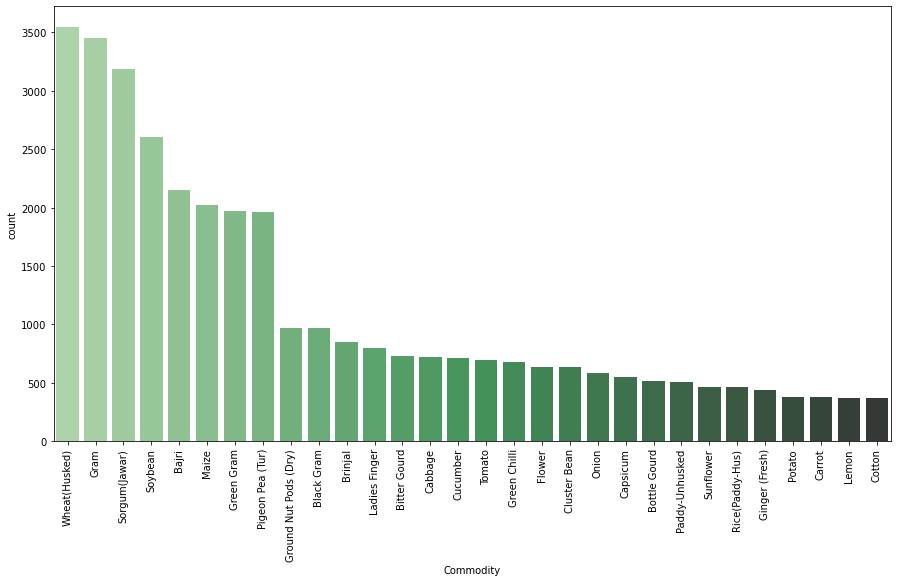

In [36]:
## Top 30 commodity production
plt.figure(figsize=(15,8))
ax2=sns.barplot(x="Commodity", y="count", data=df1,palette="Greens_d")
plt.xticks(rotation=90)



From graph :
Gram is the most popular commodity cultivated in Maharashtra.

          Wheat is the major cereal cultivated in Maharashtra.

<AxesSubplot:ylabel='None'>

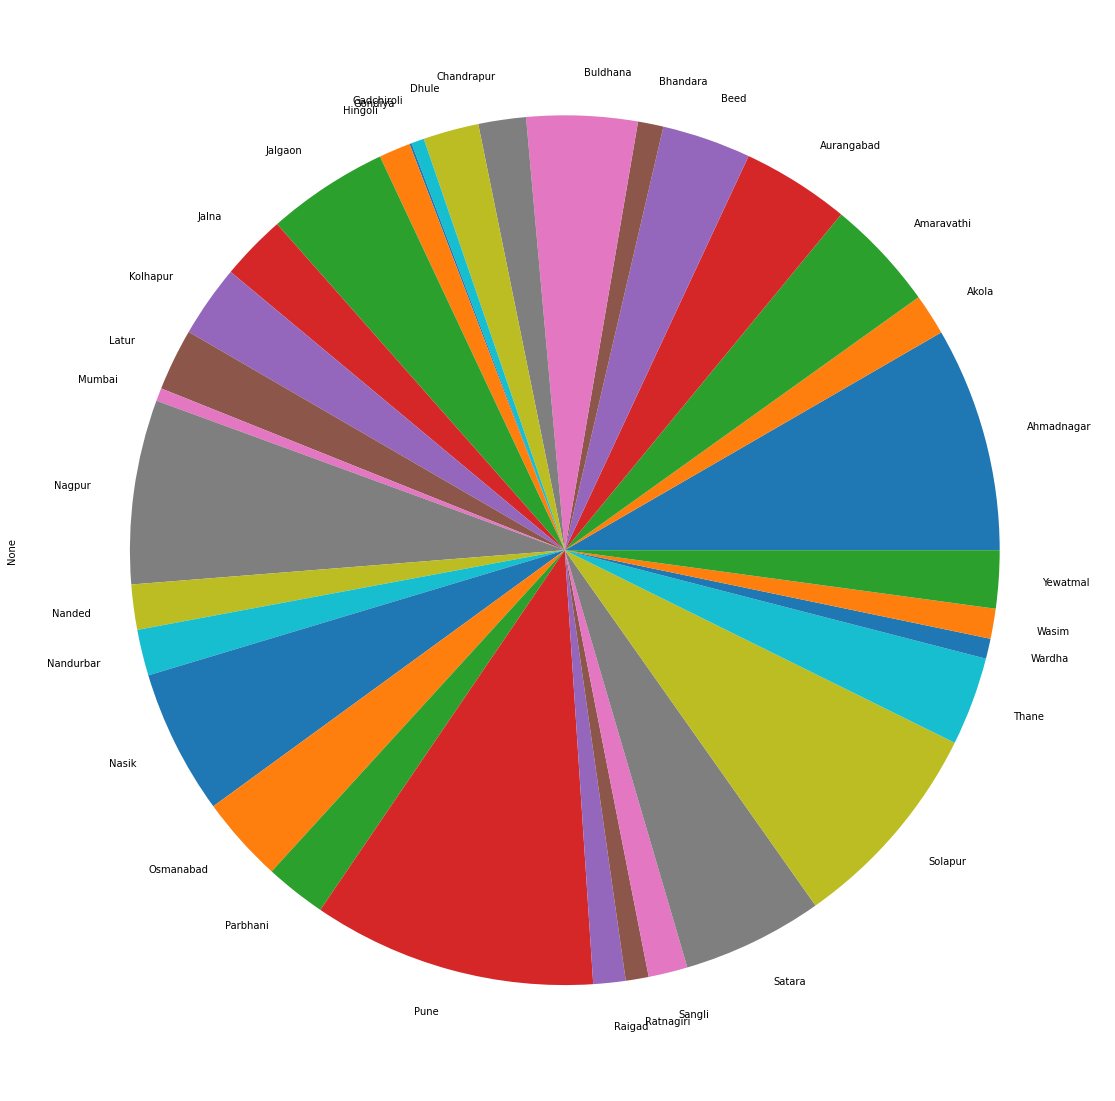

In [37]:
fig = plt.figure(figsize=(20, 20))
df.groupby(['district_name']).size().plot(kind = "pie")

From graph :
Pune has higher cultivation than other districts in Maharashtra.

            Almost 28 districts have wide range of commodities cultivated or have more cultivated areas.

### b. Bivariate Analysis
### i.Heatmap

<AxesSubplot:>

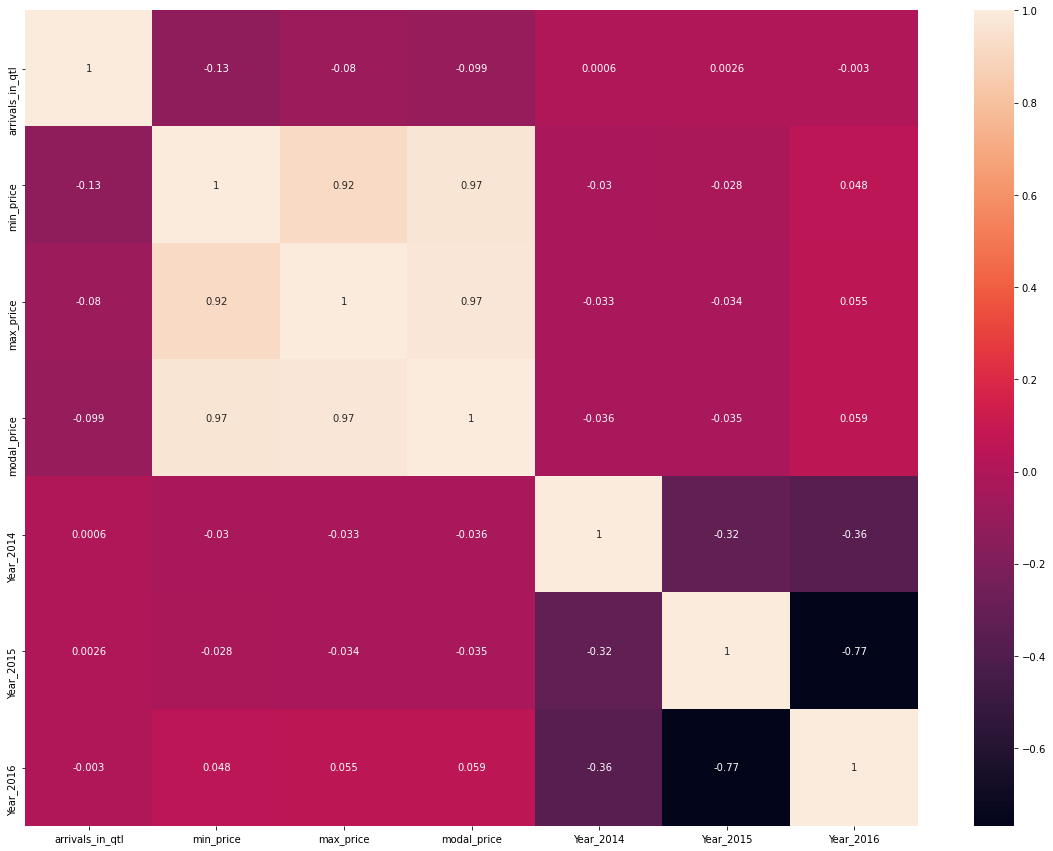

In [62]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrmatrix,annot=True)

## 4.Modelling

In [39]:
## Assigning depended and independent variables
y = data_min_max_scaled['modal_price']
X = data_min_max_scaled.drop(['modal_price','date'], axis = 1)

In [40]:
#splitting of the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, random_state=42,test_size=0.25)

### 1. Linear Regression

In [41]:
from sklearn import linear_model 
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train) 
y_pred=lr.predict(X_test)

In [42]:
## Checking the MSE and r2_score
from sklearn.metrics import mean_squared_error,r2_score
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.0007190638690214207
r squared: 0.9872817388926115


In [43]:
temp=[]
temp.append(["Linear Regression",round(mean_squared_error(y_test,y_pred),5),round(r2_score(y_test,y_pred),5)])

In [44]:
## Checking the y_test
y_test[0:5]

6775     0.178914
10202    0.469521
58181    0.570990
8369     0.202939
36694    0.203834
Name: modal_price, dtype: float64

In [45]:
## Checking the y_pred
y_pred[0:5]

array([0.17554806, 0.45950326, 0.56511326, 0.1997121 , 0.20814715])

### 2. SVR

In [46]:
from sklearn.svm import SVR

# Choose regression method and set hyperparameter
svr_rbf=SVR(C=1.0, epsilon=0.2, kernel='rbf')

# Training of the regression model
svr_rbf.fit(X_train, y_train)
y_pred = svr_rbf.predict(X_test)

In [47]:
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.009361494479260685
r squared: 0.8344209238260769


In [48]:
temp.append(["SVR",round(mean_squared_error(y_test,y_pred),5),round(r2_score(y_test,y_pred),5)])

### 3. RandomForestRegressor

In [49]:
from sklearn.ensemble import RandomForestRegressor
rm=RandomForestRegressor()
rm.fit(X_train,y_train)

y_pred=rm.predict(X_test)

In [50]:
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.0005110648135897307
r squared: 0.9909606698068716


In [51]:
temp.append(["RandomForestRegressor",round(mean_squared_error(y_test,y_pred),5),round(r2_score(y_test,y_pred),5)])

### 4. DecisionTreeRegressor

In [52]:
from sklearn.tree import DecisionTreeRegressor

# Build decision tree
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)

In [53]:
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.000926724832302611
r squared: 0.9836087878981243


In [54]:
temp.append(["DecisionTreeRegressor",round(mean_squared_error(y_test,y_pred),5),round(r2_score(y_test,y_pred),5)])

In [55]:
df8 = pd.DataFrame(temp, columns = ['Algorithms', 'MSE','r2_score'])

In [56]:
df8.sort_values(by=['MSE','r2_score'])

,Algorithms,MSE,r2_score
2,RandomForestRegressor,0.00051,0.99096
0,Linear Regression,0.00072,0.98728
3,DecisionTreeRegressor,0.00093,0.98361
1,SVR,0.00936,0.83442


From above RandomForestRegressor has lowest MSE and highest r2_score. So it is the best algorithm for this problem.

## 5. Model Fine Tuning

In [57]:
## Using gridsearch to find the best parameters
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True,False], 'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [100,150]}

In [58]:
g_search = GridSearchCV(estimator = rm, param_grid = param_grid,cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [59]:
## Fitting and printing the best parameters
g_search.fit(X_train, y_train);
print(g_search.best_params_)

{'bootstrap': True, 'max_features': 'auto', 'n_estimators': 150}


Applying these features to check if there is an increase.

In [60]:
rm=RandomForestRegressor(bootstrap=True, max_features='auto',n_estimators=150)
rm.fit(X_train,y_train)

y_pred=rm.predict(X_test)

In [61]:
## slight improvement
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r squared:",r2_score(y_test,y_pred))

MSE is:  0.000510590871856524
r squared: 0.9909690525319289


MSE value is decreased and r2_score value has increased.